In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sign
import scipy.optimize as opt

---
# PL7
## Caracterização de materiais usando **ultra-sons**
---

Trabalho prévio:
https://signal-processing.com/table.php
$$v = 2750 ms^{-1}$$
Usando que $v = \frac{\lambda}{T} \Rightarrow \lambda = \frac{v}{f} \land T = \frac{1}{f}$

Procurar valores de impedância típicos.

---

In [2]:
v = 2750

#1MHz
f1 = 1e6
lambda1 = v/f1
print(lambda1, 1/f1)
#2MHz
f2 = 2e6
lambda2 = v/f2
print(lambda2, 1/f2)

0.00275 1e-06
0.001375 5e-07


# Primeira Parte - Cilíndros 

In [3]:
#1MHz
data1_c1 = pd.read_csv('Dados/dm/c1-1mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')  
data1_c2 = pd.read_csv('Dados/dm/c2-1mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')  
data1_c3 = pd.read_csv('Dados/dm/c3-1mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')
#2Mhz
data2_c1 = pd.read_csv('Dados/dm/c1-2mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')  
data2_c2 = pd.read_csv('Dados/dm/c2-2mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')  
data2_c3 = pd.read_csv('Dados/dm/c3-2mhz.txt', delimiter='\t',encoding='latin-1',decimal=',')  

In [4]:
#os ficheiros são deste tipo
data1_c1.head()

,time [µs],HF [V],NF [V],TGC [dB]
0,0.0,0.458,0.129,0.157
1,0.1,0.536,0.412,0.315
2,0.2,0.601,0.242,-0.157
3,0.3,0.651,-0.372,-0.157
4,0.4,0.682,-0.831,0.787


## Período e largura do impulso ultra-sónico
Para os primeiros dois cilindros é relativamente fácil.

In [5]:
datas1 = [data1_c1, data1_c2, data1_c3]
amps1 = np.zeros((2000,3), float)
gains1 = np.zeros((2000,3), float)
t = np.array(datas1[0]['time [µs]']).astype(float)
for i in range(3):
    amps1[:,i] = np.array(datas1[i]['HF [V]']).astype(float)
    gains1[:,i] = np.array(datas1[i]['TGC [dB]']).astype(float)
############################
############################
datas2 = [data2_c1, data2_c2, data2_c3]
gains2 = np.zeros((2000,3),float)
amps2 = np.zeros((2000,3), float)
#Amplitude e onda no tempo
for i in range(3):
    amps2 [:,i] = np.array(datas2[i]['HF [V]']).astype(float)
    gains2[:,i] = np.array(datas2[i]['TGC [dB]']).astype(float)

In [6]:
peaks1 = []
peaks1.append(sign.find_peaks(amps1[:400,0], distance=100)[0])
peaks1.append(sign.find_peaks(amps1[:1000,1], distance=200)[0])
peaks1.append(sign.find_peaks(amps1[:1300,2], distance=400)[0])
dt1 = []
for i in range(3):
    dt1.append(t[peaks1[i][1:]-peaks1[i][:-1]])
print(
    'Distâncias entre os picos',
    [dt1[i] for i in range(3)])

peaks2 = []
peaks2.append(sign.find_peaks(amps2[:600,0], distance=100)[0])
peaks2.append(sign.find_peaks(amps2[:1000,1], distance=200)[0])
peaks2.append(sign.find_peaks(amps2[:1300,2], distance=400)[0])
dt2 = []
for i in range(3):
    dt2.append(t[peaks2[i][1:]-peaks2[i][:-1]])
print(
    'Distâncias entre os picos',
    [dt2[i] for i in range(3)])

Distâncias entre os picos [array([13.7, 14. ]), array([29.1, 30.5, 29.1]), array([58.5, 59. ])]
Distâncias entre os picos [array([13.2, 13.9, 13.8, 14. ]), array([28.6, 29.2, 29.1]), array([58.3, 58.8])]


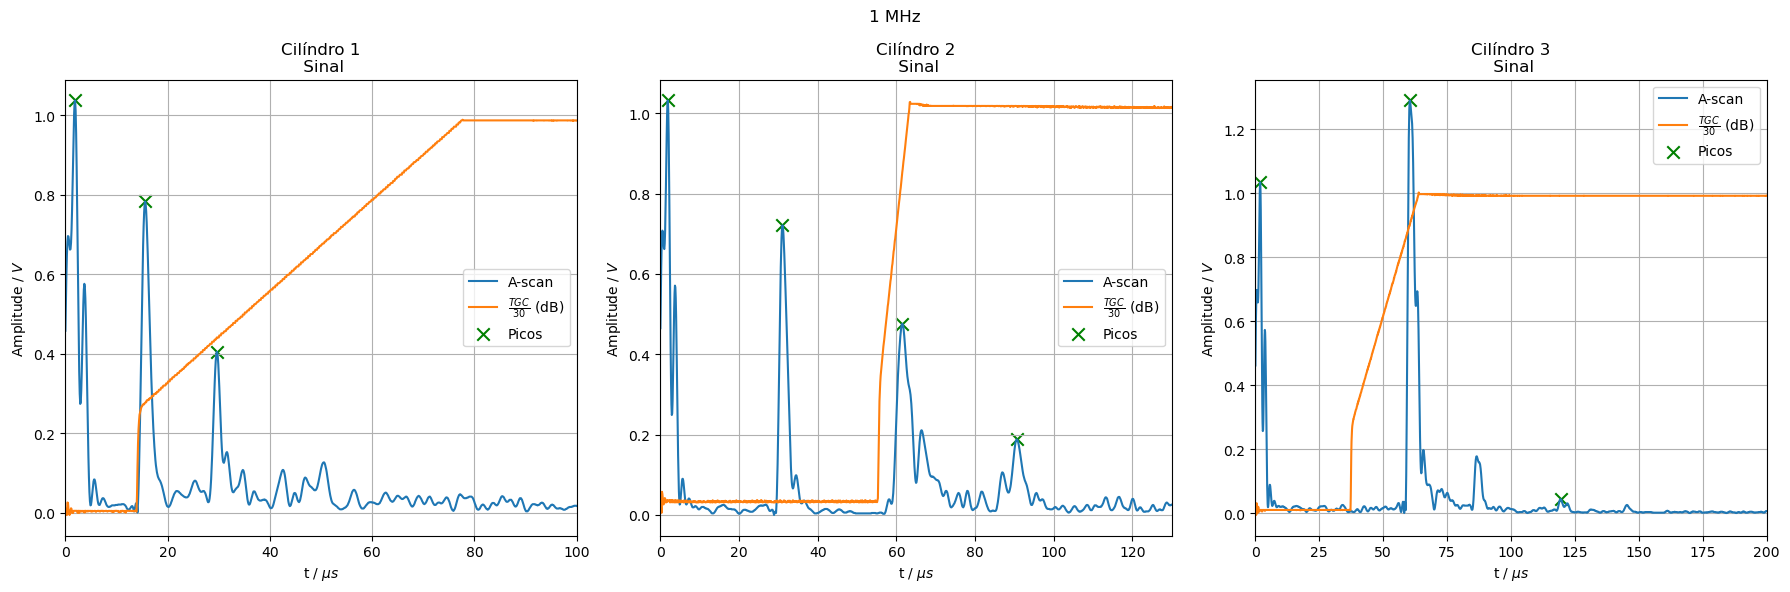

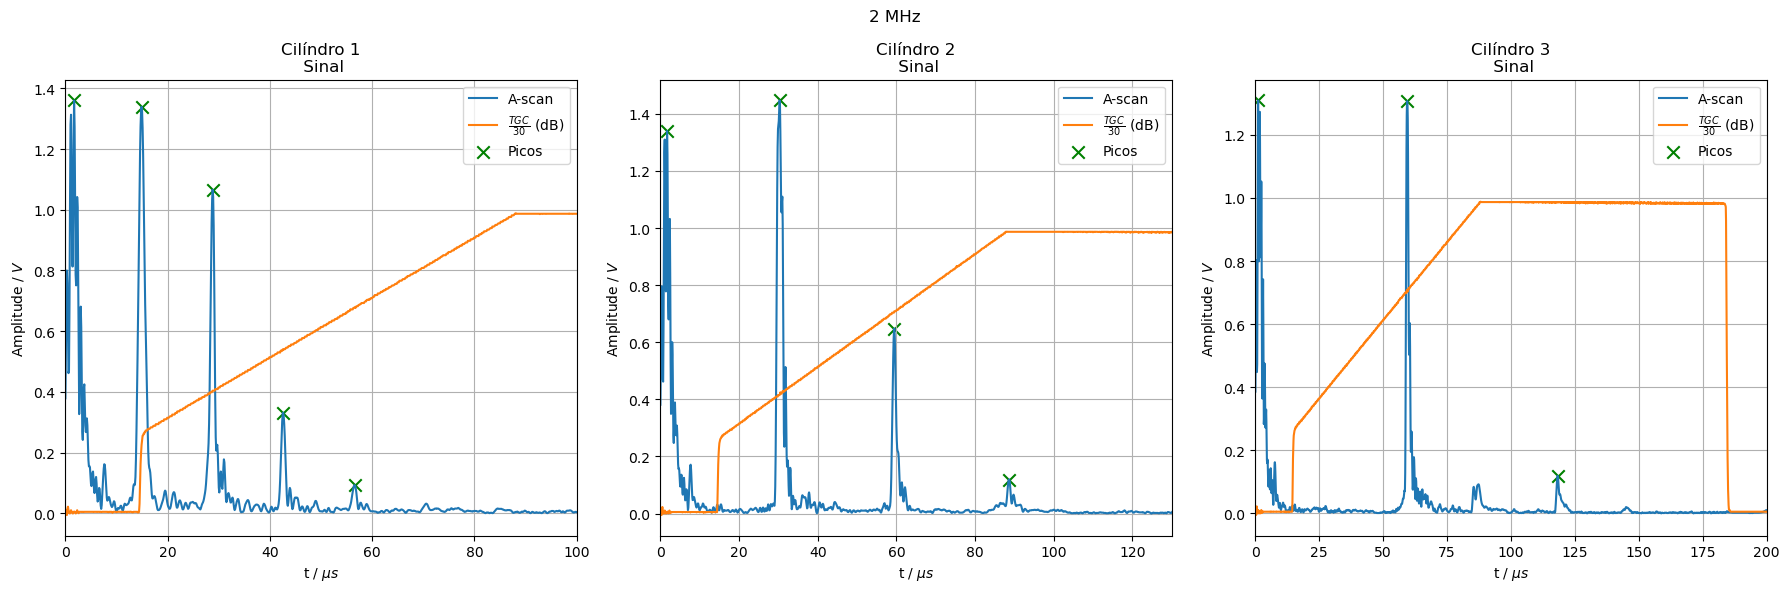

In [7]:
#plot dos picos
xlims = [100, 130, 200]
fig, axs = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('1 MHz')
#Amplitude e onda no tempo
for i in range(3):
    axs[i].plot(t,amps1[:,i], label = 'A-scan')
    axs[i].plot(t, gains1[:,i]/30, label = r'$\frac{TGC}{30}$ (dB)')
    axs[i].scatter(t[peaks1[i]], amps1[peaks1[i],i], label='Picos', marker='x',color='green',s=80)
    axs[i].set_xlabel(r't / $\mu s$')
    axs[i].set_ylabel(r'Amplitude / $V$')
    axs[i].set_title(f'Cilíndro {i+1}\n Sinal')
    axs[i].set_xlim(0,xlims[i])
    axs[i].grid()
    axs[i].legend()
plt.tight_layout()
plt.show()
############################
############################
fig, axs = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('2 MHz',)
#Amplitude e onda no tempo
for i in range(3):
    axs[i].plot(t, amps2[:,i], label = 'A-scan')
    axs[i].plot(t, gains2[:,i]/30, label = r'$\frac{TGC}{30}$ (dB)')
    axs[i].scatter(t[peaks2[i]], amps2[peaks2[i],i], label='Picos', marker='x',color='green',s= 80)
    axs[i].set_xlabel(r't / $\mu s$')
    axs[i].set_ylabel(r'Amplitude / $V$')
    axs[i].set_title(f'Cilíndro {i+1}\n Sinal')
    axs[i].set_xlim(0,xlims[i])
    axs[i].grid()
    axs[i].legend()
plt.tight_layout()
plt.show()

### Período médio e velocidade
Nota: $\mathbb{E}(x) = \text{média de x}$

portanto usarei $\mathbb{E}$ como prefixo para média

---
Até agora usei $t(\mu s)$, vou passar a usar *SI*. 

In [8]:
#período médio
Edt1 = np.zeros(3,float)
Edt2 = np.zeros(3,float)
for i in range(3):
    Edt1[i] = np.mean(dt1[i])
    Edt2[i] = np.mean(dt2[i])
print(f'T\nPara o cilíndro 1: {Edt1[0],Edt2[0]}\n')
print(f'Para o cilíndro 2: {Edt1[1],Edt2[1]}\n')
print(f'Para o cilíndro 3: {Edt1[2],Edt2[2]}\n \n')

#como esperado temos velocidades extremamente próximas para diferentes frequências
#no entanto, para f=2MHz temos consistentemente T um pouco menor
#consequentemente v maior
#Poderá a velocidade variar ligeiramente?

#velocidade
h = np.array([18.9, 40, 81,45])*10**(-3)
v1 = np.zeros(3, float)
v2 = np.zeros(3, float)
for i in range(3):
    v1[i] = 2*h[i]/(Edt1[i]*10**(-6))
    v2[i] = 2*h[i]/(Edt2[i]*10**(-6))
print(f'Velocidade\nPara o cilíndro 1: {v1[0],v2[0]}\n')
print(f'Para o cilíndro 2: {v1[1],v2[1]}\n')
print(f'Para o cilíndro 3: {v1[2],v2[2]}\n')

#velocidade prov para cada freq.
Ev1 = np.mean(v1)
Ev2 = np.mean(v2)
print(f'Velocidades prov. {Ev1,Ev2}')

T
Para o cilíndro 1: (np.float64(13.85), np.float64(13.725000000000001))

Para o cilíndro 2: (np.float64(29.566666666666666), np.float64(28.96666666666667))

Para o cilíndro 3: (np.float64(58.75), np.float64(58.55))
 

Velocidade
Para o cilíndro 1: (np.float64(2729.241877256318), np.float64(2754.0983606557375))

Para o cilíndro 2: (np.float64(2705.749718151071), np.float64(2761.795166858458))

Para o cilíndro 3: (np.float64(2757.4468085106387), np.float64(2766.8659265584974))

Velocidades prov. (np.float64(2730.812801306009), np.float64(2760.919818024231))


---
Uma diferença de $30 ms^{-1}$ pode não ser relevante em relação à nossa incerteza

---
### Ajuste Exp. Atenuação

In [9]:
def undo_tgc(amplified, tgc_db, tgc_time=None, sig_time=None, db_on_power=False):
    """
    Undo TGC applied to `amplified` signal.
    amplified : 1D numpy array (real or complex)
    tgc_db    : 1D numpy array (dB values of the gain that was applied)
    tgc_time  : times corresponding to tgc_db (optional)
    sig_time  : times corresponding to amplified (optional)
    db_on_power : False (default) => dB are amplitude dB (use 20 factor).
                  True => dB are power dB (use 10 factor).
    Returns recovered signal (same dtype as amplified).
    """
    amplified = np.asarray(amplified)
    tgc_db = np.asarray(tgc_db)
    Nsig = amplified.shape[0]
    # create sig_time if not provided
    if sig_time is None:
        sig_time = np.linspace(0, 1, Nsig)
    else:
        sig_time = np.asarray(sig_time)
    if tgc_time is None:
        # if lengths match, assume they align samplewise
        if len(tgc_db) == Nsig:
            tgc_db_interp = tgc_db
        else:
            # assume tgc_db given at different density; interpolate over index-scaled axis
            tgc_db_interp = np.interp(np.linspace(0, Nsig-1, Nsig),
                                      np.linspace(0, Nsig-1, len(tgc_db)),
                                      tgc_db)
    else:
        tgc_time = np.asarray(tgc_time)
        # interpolate TGC (in dB) to the signal timepoints
        tgc_db_interp = np.interp(sig_time, tgc_time, tgc_db)

    if db_on_power:
        inv_linear = 10.0 ** (-tgc_db_interp / 10.0)
    else:
        inv_linear = 10.0 ** (-tgc_db_interp / 20.0)

    # Apply inverse gain to each sample (works for complex signals too)
    recovered = amplified * inv_linear
    return recovered, inv_linear
    
#função que reverte o efeito do ganho
#Amp1 será o original, amps1 o que tem ganho
Amp1 = np.zeros((2000,3), float)
Amp2 = np.zeros((2000,3), float)
for i in range(3):
    Amp1[:,i] = undo_tgc(amps1[:,i],gains1[:,i])[0] 
    Amp2[:,i] = undo_tgc(amps2[:,i],gains2[:,i])[0]

In [10]:
#picos de novo, mas agr na curva sem ganho
Peaks1 = []
Peaks1.append(sign.find_peaks(Amp1[:400,0], distance=100)[0][1:])
Peaks1.append(sign.find_peaks(Amp1[:800,1], distance=200)[0][1:])
Peaks1.append(sign.find_peaks(Amp1[:800,2], distance=400)[0][1:])

Peaks2 = []
Peaks2.append(sign.find_peaks(Amp2[:600,0], distance=100)[0][1:])
Peaks2.append(sign.find_peaks(Amp2[:1300,1], distance=200)[0][1:])
Peaks2.append(sign.find_peaks(Amp2[:1300,2], distance=400)[0][1:])

################################
def atenuation(s, A0, mu):
    return A0*np.exp(-s * mu)

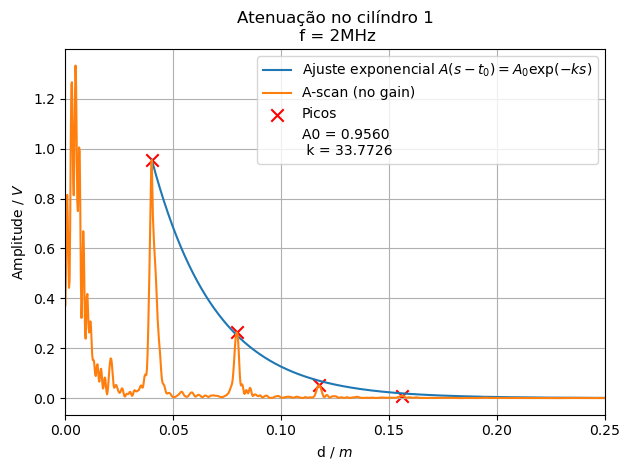

In [11]:
#plot da atenuação no único em que é possível
s = t*10**(-6) * Ev2
params = opt.curve_fit(atenuation,s[Peaks2[0]]-s[Peaks2[0]][0], Amp2[Peaks2[0],0])[0]
adjust = lambda x: atenuation(x,params[0],params[1])

plt.plot(s+s[Peaks2[0]][0], adjust(s), label = r"Ajuste exponencial $A(s-t_0) = A_0 \exp(-k s)$")
plt.plot(s, Amp2[:,0], label = 'A-scan (no gain)')
plt.scatter(s[Peaks2[0]], Amp2[Peaks2[0],0], label='Picos', marker='x',color='red',s= 80)
plt.xlabel(r'd / $m$')
plt.ylabel(r'Amplitude / $V$')
plt.title(f'Atenuação no cilíndro {1}\n f = 2MHz')
plt.grid()
plt.scatter(0,0,alpha=0, label = f"A0 = {params[0]:.4f}\n k = {params[1]:.4f}")
plt.xlim(0,0.25)
plt.legend()
plt.tight_layout()
plt.show()

---
# Imperfeições
## Modo Profundidade 

In [69]:
#[imperfeição][y][medição][MHz]
Ay11 = pd.read_csv('Dados/dm/A-1mhz_y1.txt', delimiter='\t', decimal=',')
Ay21 = pd.read_csv('Dados/dm/A-1mhz_y2.txt', delimiter='\t', decimal=',')
By11 = pd.read_csv('Dados/dm/B-1mhz_y1.txt', delimiter='\t', decimal=',')
By21 = pd.read_csv('Dados/dm/B-1mhz_y2.txt', delimiter='\t', decimal=',')
Cy11 = pd.read_csv('Dados/dm/C-1mhz_y1.txt', delimiter='\t', decimal=',')
Cy21 = pd.read_csv('Dados/dm/C-1mhz_y2.txt', delimiter='\t', decimal=',')

Ay12 = pd.read_csv('Dados/dm/A-2mhz_y1.txt', delimiter='\t', decimal=',')
Ay22 = pd.read_csv('Dados/dm/A-2mhz_y2.txt', delimiter='\t', decimal=',')
By12 = pd.read_csv('Dados/dm/B-2mhz_y1.txt', delimiter='\t', decimal=',')
By22 = pd.read_csv('Dados/dm/B-2mhz_y2.txt', delimiter='\t', decimal=',')
Cy12 = pd.read_csv('Dados/dm/C-2mhz_y1.txt', delimiter='\t', decimal=',')
Cy22 = pd.read_csv('Dados/dm/C-2mhz_y2.txt', delimiter='\t', decimal=',')

In [13]:
(s[Peaks2[0]][1:]-s[Peaks2[0]][:-1])/2

array([0.01974058, 0.01905035, 0.01932644])

In [52]:
Ay11

,depth[mm],HF [V],NF [V],TGC [dB]
0,-2.6,0.445,0.121,0.000
1,-2.5,0.516,0.402,0.157
2,-2.4,0.575,0.234,-0.157
3,-2.2,0.616,-0.372,-0.157
4,-2.1,0.640,-0.808,0.630
...,...,...,...,...
995,135.7,0.004,-0.003,0.000
996,135.8,0.001,-0.002,0.000
997,135.9,0.002,0.005,0.000
998,136.1,0.004,0.006,0.000


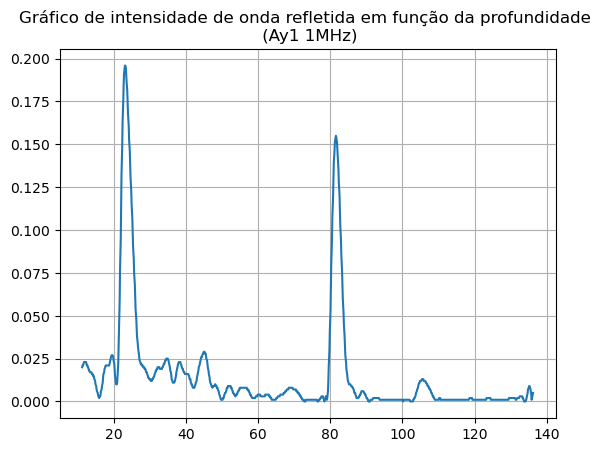

(array([ 86, 293, 506]), {})


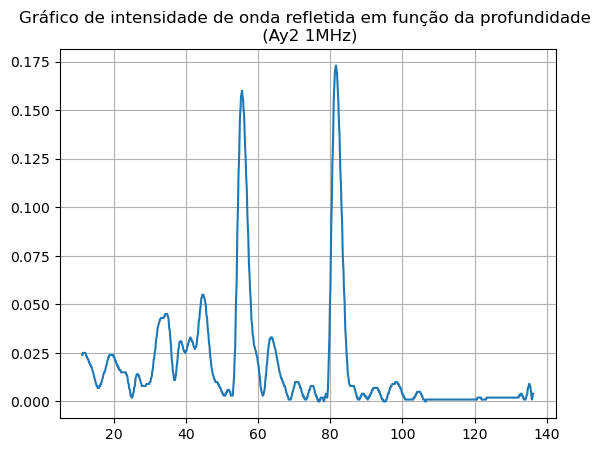

(array([  4, 168, 319, 506, 626]), {})


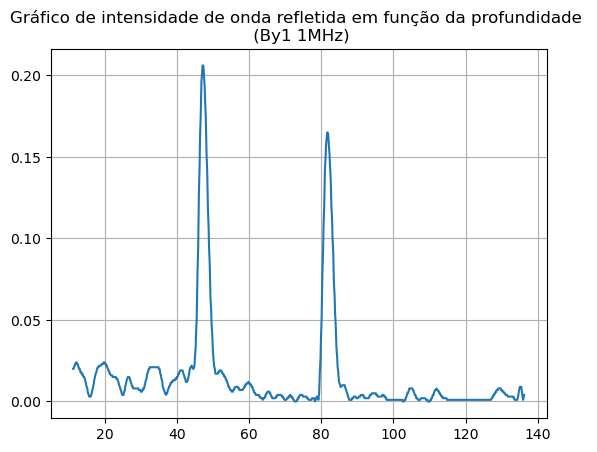

(array([  6, 110, 258, 389, 507, 673]), {})


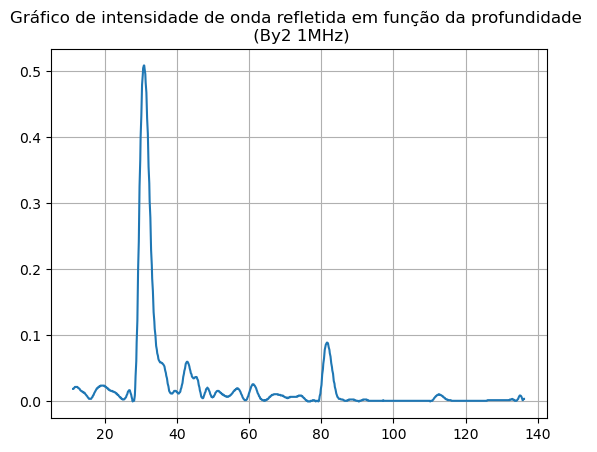

(array([  6, 141, 245, 359, 506, 618]), {})


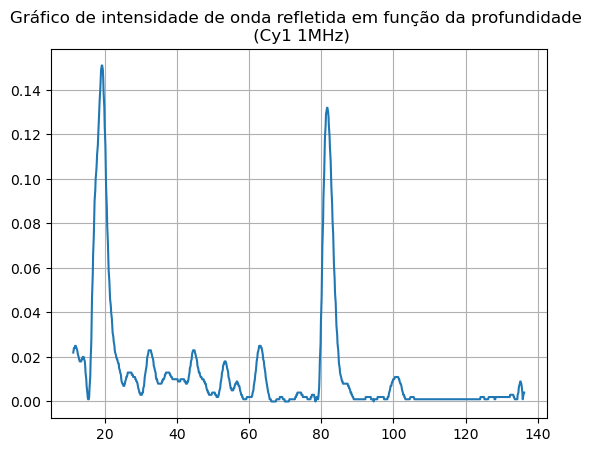

(array([ 57, 240, 372, 506, 644]), {})
0.151


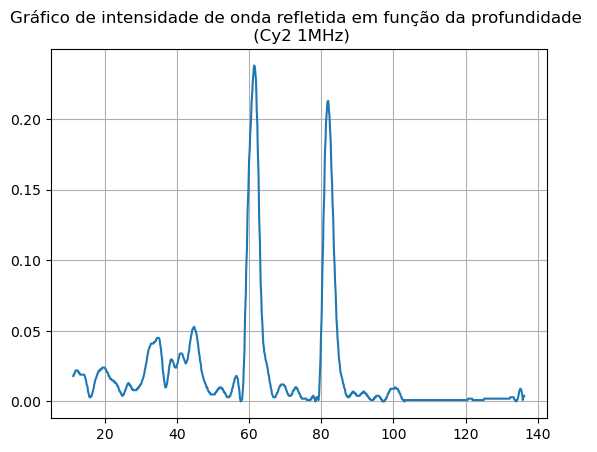

(array([ 60, 241, 361, 508, 642]), {})
0.238


In [68]:
#Encontrar picos de Ay11

plt.plot(Ay11["depth[mm]"][100:], Ay11["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Ay1 1MHz)")
plt.grid()
plt.show()
picA11 = sign.find_peaks(Ay11["HF [V]"][100:800], distance = 200) 
print(picA11)
picA11 = 186



#Encontrar picos de Ay21

plt.plot(Ay21["depth[mm]"][100:], Ay21["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Ay2 1MHz)")
plt.grid()
plt.show()
picA21 = sign.find_peaks(Ay21["HF [V]"][100:800], distance = 100) 
print(picA21)
picA21 = 319+100

#Encontrar picos de By11

plt.plot(By11["depth[mm]"][100:], By11["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (By1 1MHz)")
plt.grid()
plt.show()
picB11 = sign.find_peaks(By11["HF [V]"][100:800], distance = 100) 
print(picB11)
picB11 = 389+100

#Encontrar picos de By21

plt.plot(By21["depth[mm]"][100:], By21["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (By2 1MHz)")
plt.grid()
plt.show()
picB21 = sign.find_peaks(By21["HF [V]"][100:800], distance = 100) 
print(picB21)
picB21 = 241

#Encontrar picos de Cy11

plt.plot(Cy11["depth[mm]"][100:], Cy11["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Cy1 1MHz)")
plt.grid()
plt.show()
picC11 = sign.find_peaks(Cy11["HF [V]"][100:800], distance = 100) 
print(picC11)
picC11 = 157

#Encontrar picos de Cy21

plt.plot(Cy21["depth[mm]"][100:], Cy21["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Cy2 1MHz)")
plt.grid()
plt.show()
picC21 = sign.find_peaks(Cy21["HF [V]"][100:800], distance = 100) 
print(picC21)
picC21 = 461

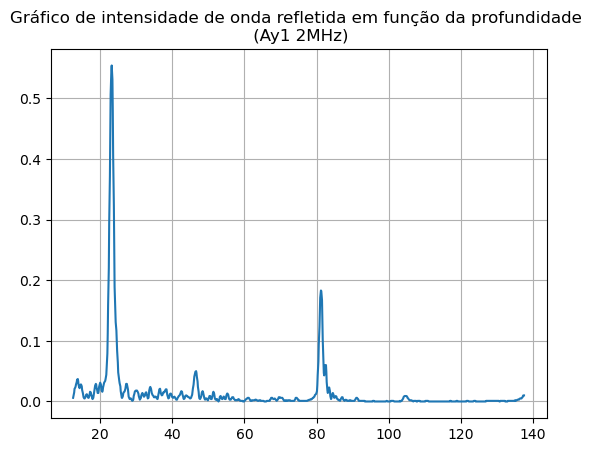

(array([ 77, 280, 494]), {})
0.554


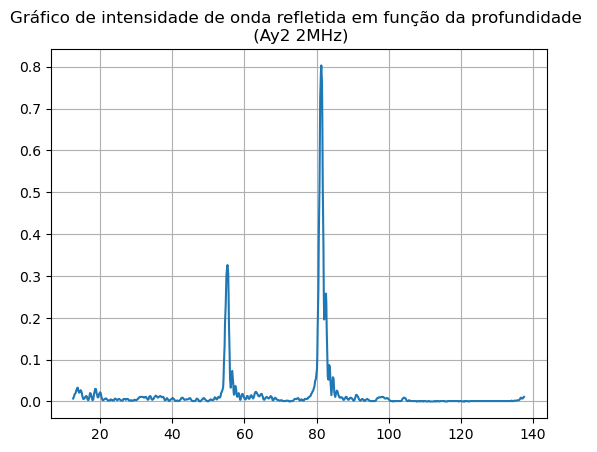

(array([  9, 165, 308, 495, 616]), {})
0.326


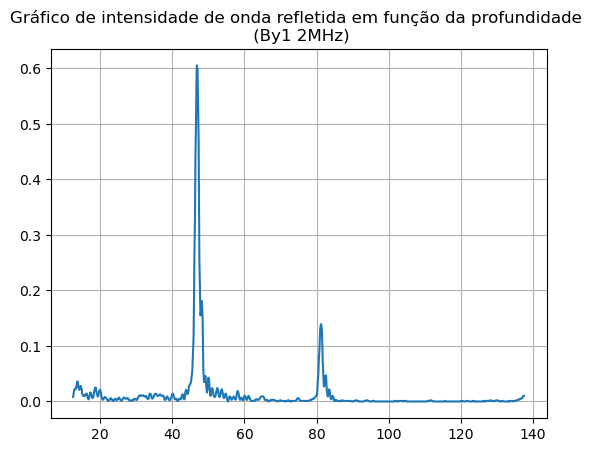

(array([  9, 133, 247, 350, 494, 598]), {})
0.605


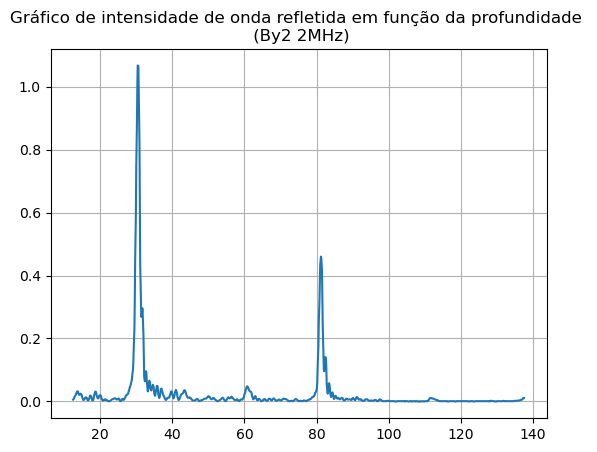

(array([  8, 129, 232, 347, 494, 612]), {})
1.067


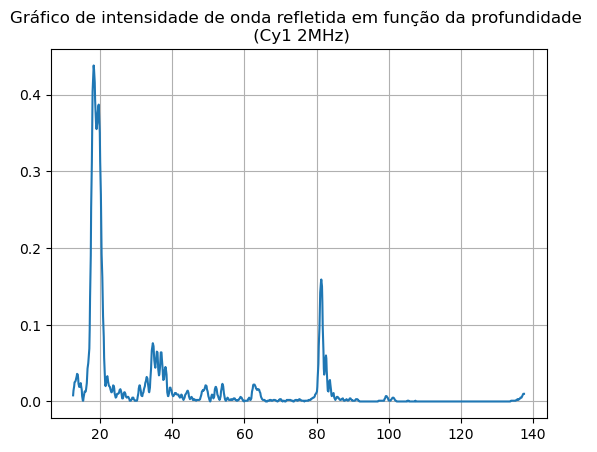

(array([ 41, 159, 298, 495, 624]), {})
0.438


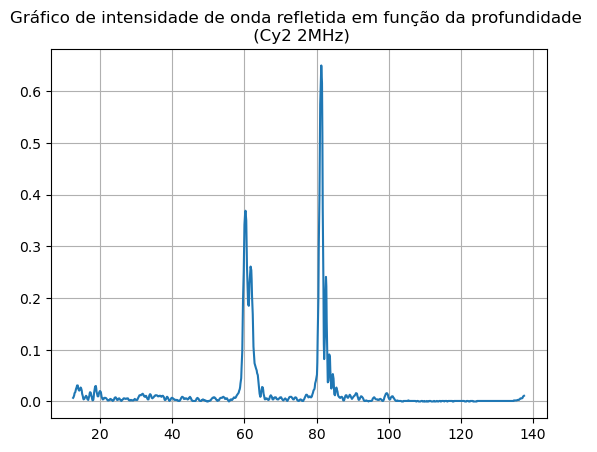

(array([  8, 139, 344, 495, 625]), {})
0.369 60.3


In [92]:
#Encontrar picos de Ay12

plt.plot(Ay12["depth[mm]"][100:], Ay12["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Ay1 2MHz)")
plt.grid()
plt.show()
picA12 = sign.find_peaks(Ay12["HF [V]"][100:800], distance = 200) 
print(picA12)
picA12 = 177
print(Ay12["HF [V]"][177])

#Encontrar picos de Ay22

plt.plot(Ay22["depth[mm]"][100:], Ay22["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Ay2 2MHz)")
plt.grid()
plt.show()
picA22 = sign.find_peaks(Ay22["HF [V]"][100:800], distance = 100) 
print(picA22)
picA22 = 408
print(Ay22["HF [V]"][408])

#Encontrar picos de By12

plt.plot(By12["depth[mm]"][100:], By12["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (By1 2MHz)")
plt.grid()
plt.show()
picB12 = sign.find_peaks(By12["HF [V]"][100:800], distance = 100) 
print(picB12)
picB12 = 347
print(By12["HF [V]"][347])

#Encontrar picos de By22

plt.plot(By22["depth[mm]"][100:], By22["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (By2 2MHz)")
plt.grid()
plt.show()
picB22 = sign.find_peaks(By22["HF [V]"][100:800], distance = 100) 
print(picB22)
picB22 = 229
print(By22["HF [V]"][229])

#Encontrar picos de Cy12

plt.plot(Cy12["depth[mm]"][100:], Cy12["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Cy1 2MHz)")
plt.grid()
plt.show()
picC12 = sign.find_peaks(Cy12["HF [V]"][100:800], distance = 100) 
print(picC12)
picC12 = 141
print(Cy12["HF [V]"][141])

#Encontrar picos de Cy22

plt.plot(Cy22["depth[mm]"][100:], Cy22["HF [V]"][100:])
plt.title("Gráfico de intensidade de onda refletida em função da profundidade \n (Cy2 2MHz)")
plt.grid()
plt.show()
picC22 = sign.find_peaks(Cy22["HF [V]"][100:800], distance = 100) 
print(picC22)
picC22 = 444
print(Cy22["HF [V]"][444], Cy22["depth[mm]"][444])

In [100]:
picos_1mhz = np.array([picA11, picA21, picB11, picB21, picC11, picC21])
picos_2mhz = np.array([picA12, picA22, picB12, picB22, picC12, picC22])

#profundidades para 1mhz e 2mhz
profs_1mhz = np.zeros_like(picos_1mhz, dtype = float)
profs_2mhz = np.zeros_like(picos_1mhz, dtype = float)

profs_1mhz[0] = Ay11["depth[mm]"][picos_1mhz[0]]
profs_2mhz[0] = Ay12["depth[mm]"][picos_2mhz[0]]

profs_1mhz[1] = Ay21["depth[mm]"][picos_1mhz[1]]
profs_2mhz[1] = Ay22["depth[mm]"][picos_2mhz[1]]

profs_1mhz[2] = By11["depth[mm]"][picos_1mhz[2]]
profs_2mhz[2] = By12["depth[mm]"][picos_2mhz[2]]

profs_1mhz[3] = By21["depth[mm]"][picos_1mhz[3]]
profs_2mhz[3] = By22["depth[mm]"][picos_2mhz[3]]

profs_1mhz[4] = Cy11["depth[mm]"][picos_1mhz[4]]
profs_2mhz[4] = Cy12["depth[mm]"][picos_2mhz[4]]

profs_1mhz[5] = Cy21["depth[mm]"][picos_1mhz[5]]
profs_2mhz[5] = Cy22["depth[mm]"][picos_2mhz[5]]

In [101]:
diametros_1mhz = np.zeros(3)
diametros_2mhz = np.zeros(3)

for i in range(3):
    diametros_1mhz[i] = abs(profs_1mhz[2*i] - profs_1mhz[2*i+1]) 
    diametros_2mhz[i] = abs(profs_2mhz[2*i] - profs_2mhz[2*i+1]) 

diametros_1mhz, diametros_2mhz

(array([32.4, 34.4, 42.2]), array([32.1, 16.4, 42.1]))